In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone_dataset.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

we can see that other than 'sex' and 'Rings' all other columns are in the Data are object type and rings in integer

# EDA and visualization

firt we need to give unique values to 'Sex' variable and changing the data from nominal to numeric

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<AxesSubplot:>

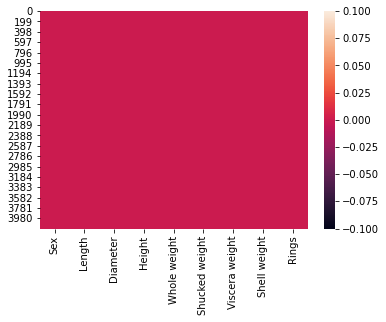

In [8]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Height', ylabel='Density'>

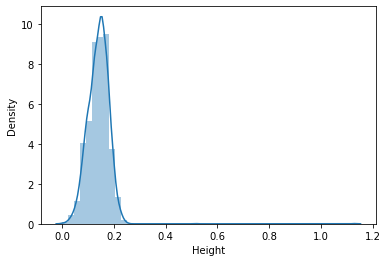

In [9]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

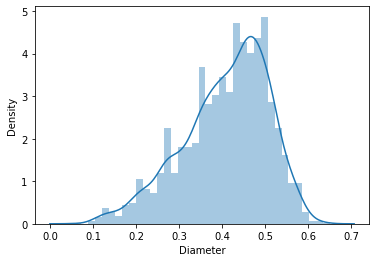

In [10]:
sns.distplot(df['Diameter'])

In [11]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


we can see there is some skewness present in the data

In [12]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

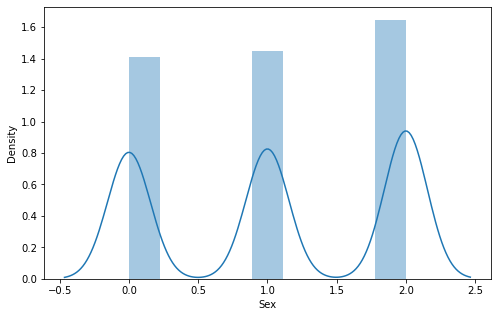

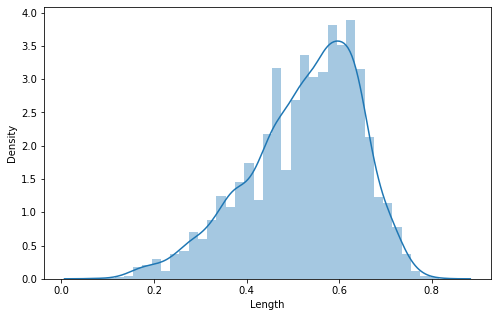

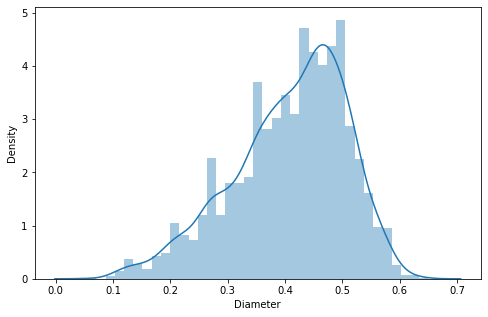

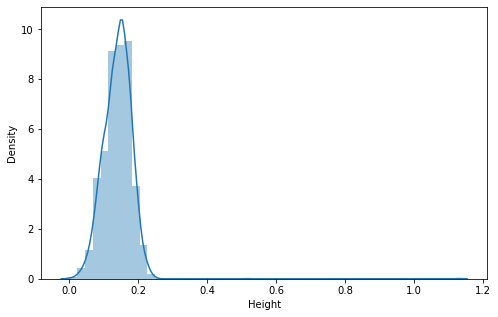

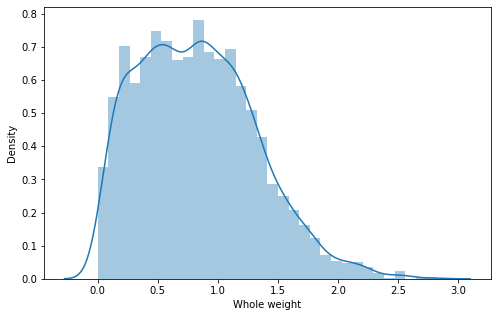

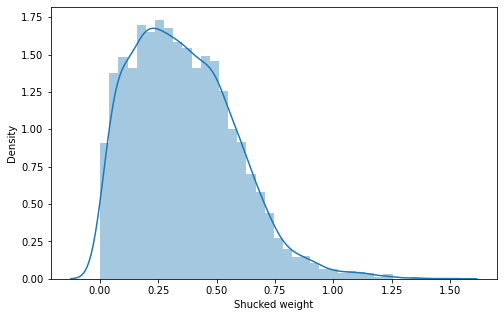

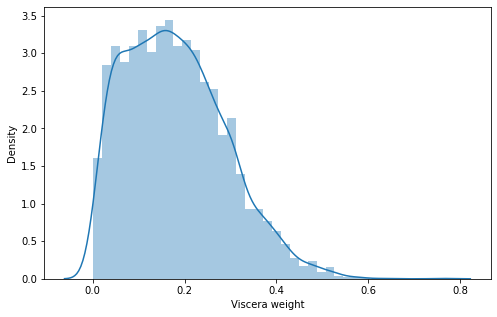

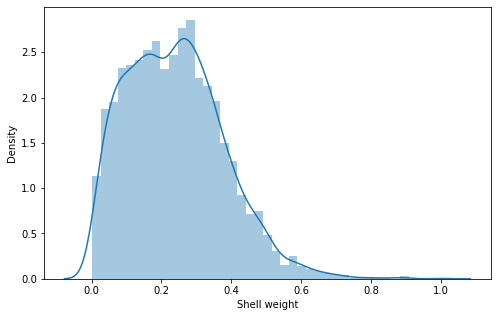

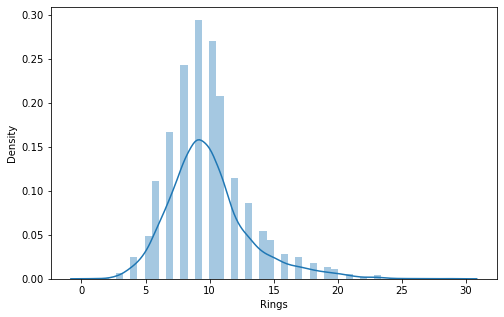

In [13]:
for i in df.columns:
    plt.figure(figsize=(8,5))
    sns.distplot(df[i])

there is skewness in almost all columns

.

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

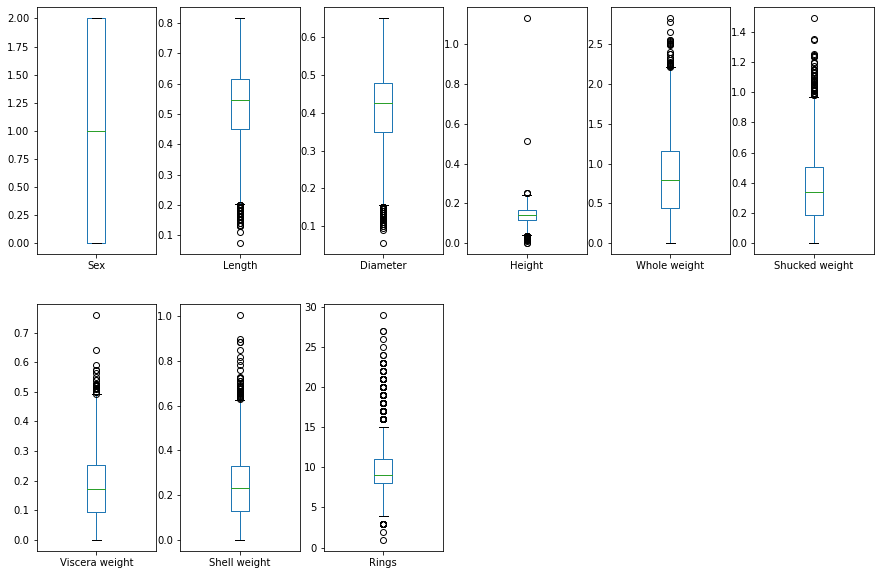

In [14]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,10))

we can see that outliers are present in all the columns other than 'Sex'

.

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

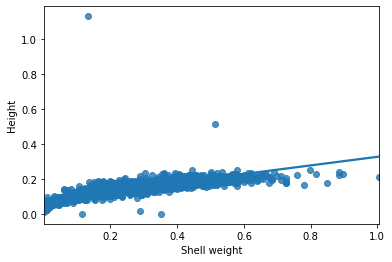

In [15]:
sns.regplot(x='Shell weight',y='Height',data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

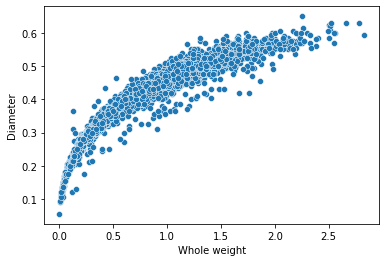

In [16]:
sns.scatterplot(x='Whole weight',y='Diameter',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

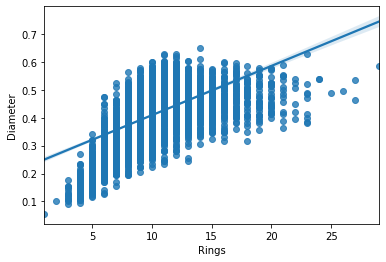

In [17]:
sns.regplot(x='Rings',y='Diameter',data=df)

# Removing Outliers

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

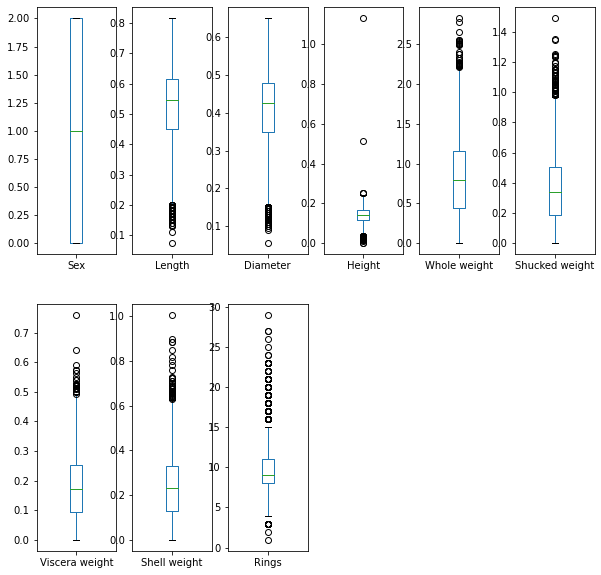

In [18]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [19]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [20]:
z[6][8]

3.12251641377204

In [21]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
df.shape

(4177, 9)

In [23]:
dataloss_percent=(4177-4027)/4177*100
dataloss_percent

3.5910940866650707

WILL cross check if there are still any outliers present in the data

.

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

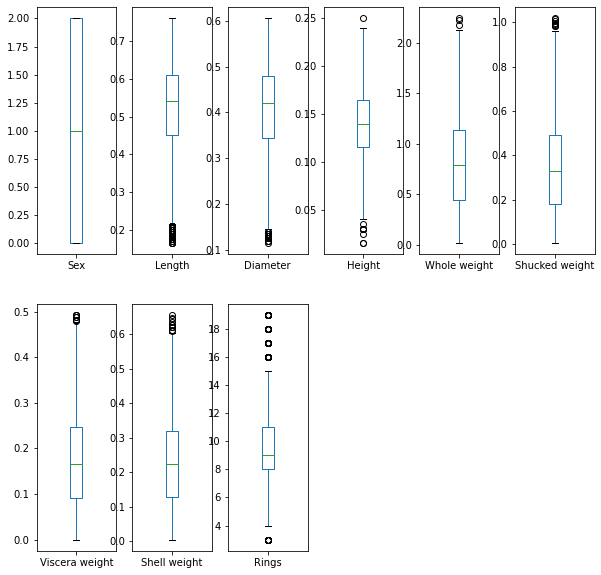

In [24]:
df_new.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [25]:
Q1=df_new.quantile(0.25)
Q3=df_new.quantile(0.75)
IQR=Q3-Q1

#keeping rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df2 = df_new[~((df_new < (Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]


df2.shape

(3770, 9)

In [26]:
dataloss=(4177-3770)/4177*100
dataloss

9.743835288484558

AS the dataloss is not more than 10 % we can move ahead

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

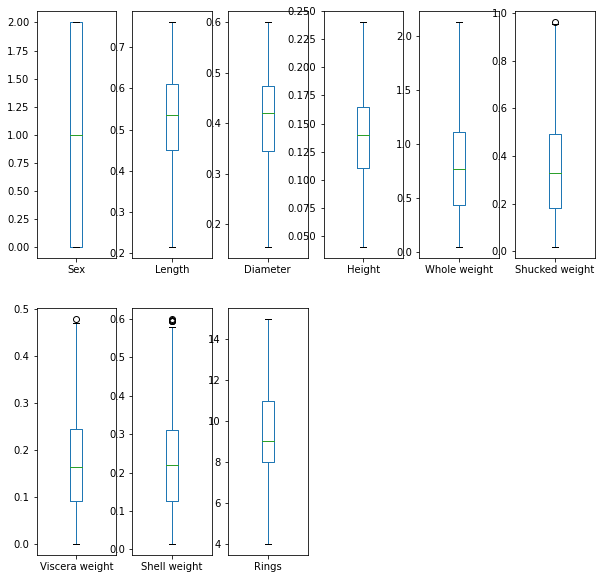

In [27]:
df2.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

almost all the outliers are removed 

.

# correlation and Vif

In [28]:
df2.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.038089,-0.040973,-0.045084,-0.029685,-0.012628,-0.038466,-0.039622,-0.023764
Length,-0.038089,1.000000,0.985870,0.894017,0.941298,0.915760,0.914736,0.924119,0.585109
Diameter,-0.040973,0.985870,1.000000,0.899634,0.939310,0.909095,0.909339,0.930413,0.602591
Height,-0.045084,0.894017,0.899634,1.000000,0.894123,0.847997,0.874580,0.901791,0.614261
Whole weight,-0.029685,0.941298,0.939310,0.894123,1.000000,0.973138,0.966604,0.962087,0.559007
Shucked weight,-0.012628,0.915760,0.909095,0.847997,0.973138,1.000000,0.929763,0.903150,0.466799
Viscera weight,-0.038466,0.914736,0.909339,0.874580,0.966604,0.929763,1.000000,0.922615,0.544512
Shell weight,-0.039622,0.924119,0.930413,0.901791,0.962087,0.903150,0.922615,1.000000,0.622825
Rings,-0.023764,0.585109,0.602591,0.614261,0.559007,0.466799,0.544512,0.622825,1.000000


<AxesSubplot:>

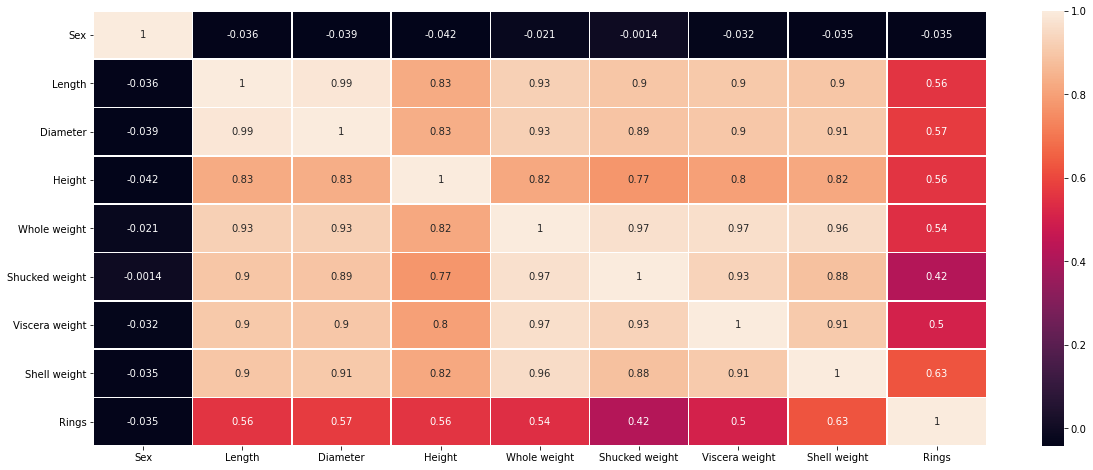

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

In [30]:
x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

In [31]:
x.shape

(3770, 8)

In [32]:
y.shape

(3770,)

In [33]:
import scipy.stats

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(data):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
    vif['Features']=data.columns
    print(vif)

In [35]:
vif_cal(x)

   VIF Factor        Features
0    2.623292             Sex
1  764.780303          Length
2  816.359111        Diameter
3   96.443951          Height
4  446.471151    Whole weight
5  113.256935  Shucked weight
6   67.497092  Viscera weight
7   94.723403    Shell weight


In [36]:
vif_cal(x.drop(['Diameter'],axis=1))

   VIF Factor        Features
0    2.622848             Sex
1   86.053912          Length
2   94.396601          Height
3  446.362015    Whole weight
4  113.247708  Shucked weight
5   67.231024  Viscera weight
6   92.696421    Shell weight


In [37]:
vif_cal(x.drop(['Diameter','Whole weight'],axis=1))

   VIF Factor        Features
0    2.621672             Sex
1   86.023579          Length
2   94.395704          Height
3   33.537027  Shucked weight
4   41.075117  Viscera weight
5   38.432462    Shell weight


so we decide to drop the column Diameter and Whloe weight as it was having high variance inflation 

In [38]:
x=x.drop(['Diameter','Whole weight'],axis=1)

In [39]:
x

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.095,0.2245,0.1010,0.1500
1,2,0.350,0.090,0.0995,0.0485,0.0700
2,0,0.530,0.135,0.2565,0.1415,0.2100
3,2,0.440,0.125,0.2155,0.1140,0.1550
4,1,0.330,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.565,0.165,0.3700,0.2390,0.2490
4173,2,0.590,0.135,0.4390,0.2145,0.2605
4174,2,0.600,0.205,0.5255,0.2875,0.3080
4175,0,0.625,0.150,0.5310,0.2610,0.2960


In [40]:
x.corr()

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
Sex,1.000000,-0.038089,-0.045084,-0.012628,-0.038466,-0.039622
Length,-0.038089,1.000000,0.894017,0.915760,0.914736,0.924119
Height,-0.045084,0.894017,1.000000,0.847997,0.874580,0.901791
Shucked weight,-0.012628,0.915760,0.847997,1.000000,0.929763,0.903150
Viscera weight,-0.038466,0.914736,0.874580,0.929763,1.000000,0.922615
Shell weight,-0.039622,0.924119,0.901791,0.903150,0.922615,1.000000


# Removing skewness and using Feature scaling

In [41]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x

array([[ 1.1372601 , -0.68301301, -1.19216524, -0.5378362 , -0.68355845,
        -0.57383199],
       [ 1.1372601 , -1.45499705, -1.32401758, -1.3313513 , -1.35195418,
        -1.35421466],
       [-1.32197308, -0.02174005, -0.09394098, -0.35544793, -0.22210146,
        -0.04581562],
       ...,
       [ 1.1372601 ,  0.68747349,  2.01988638,  0.92665864,  1.13532423,
         0.72835925],
       [-1.32197308,  0.96386232,  0.33813714,  0.94901985,  0.91916491,
         0.63885038],
       [ 1.1372601 ,  2.00129272,  1.70253148,  2.33107674,  1.78300618,
         1.96535828]])

as we removed the skewness we will proceed to scaling

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.1372601 , -0.68301301, -1.19216524, -0.5378362 , -0.68355845,
        -0.57383199],
       [ 1.1372601 , -1.45499705, -1.32401758, -1.3313513 , -1.35195418,
        -1.35421466],
       [-1.32197308, -0.02174005, -0.09394098, -0.35544793, -0.22210146,
        -0.04581562],
       ...,
       [ 1.1372601 ,  0.68747349,  2.01988638,  0.92665864,  1.13532423,
         0.72835925],
       [-1.32197308,  0.96386232,  0.33813714,  0.94901985,  0.91916491,
         0.63885038],
       [ 1.1372601 ,  2.00129272,  1.70253148,  2.33107674,  1.78300618,
         1.96535828]])

# Predicting Data and testing Models

In [43]:
x.shape

(3770, 6)

In [44]:
y.shape

(3770,)

In [45]:
x

array([[ 1.1372601 , -0.68301301, -1.19216524, -0.5378362 , -0.68355845,
        -0.57383199],
       [ 1.1372601 , -1.45499705, -1.32401758, -1.3313513 , -1.35195418,
        -1.35421466],
       [-1.32197308, -0.02174005, -0.09394098, -0.35544793, -0.22210146,
        -0.04581562],
       ...,
       [ 1.1372601 ,  0.68747349,  2.01988638,  0.92665864,  1.13532423,
         0.72835925],
       [-1.32197308,  0.96386232,  0.33813714,  0.94901985,  0.91916491,
         0.63885038],
       [ 1.1372601 ,  2.00129272,  1.70253148,  2.33107674,  1.78300618,
         1.96535828]])

In [46]:
for i in range(0,7):
    pca=PCA(n_components=i)
    prin=pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

0 0
1 0.7818714250354093
2 0.9479563473046883
3 0.97355110407621
4 0.9848570361758313
5 0.9938906061243811
6 1.0


In [47]:
lr=LinearRegression()


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
predlr=lr.predict(xtest)

In [48]:
lr.score(xtrain,ytrain)

0.4836210191235587

In [49]:
dt=DecisionTreeRegressor()
rfr=RandomForestRegressor()
lr=LinearRegression()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
knr=KNeighborsRegressor()
br=BaggingRegressor()

model=[lr,dt,rfr,adr,gbr,knr,br]

In [50]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('Accuracy score of ',m,'is')
    print(m.score(xtrain,ytrain))
    print('\n')

Accuracy score of  LinearRegression() is
0.4836210191235587


Accuracy score of  DecisionTreeRegressor() is
1.0


Accuracy score of  RandomForestRegressor() is
0.9331076571266396


Accuracy score of  AdaBoostRegressor() is
0.3999691353214577


Accuracy score of  GradientBoostingRegressor() is
0.6225659454062478


Accuracy score of  KNeighborsRegressor() is
0.6471757003114548


Accuracy score of  BaggingRegressor() is
0.907117862734972




checking the top 3 models with the highest score 

In [51]:
score=cross_val_score(dt,x,y,cv=10)
print(score)
print(score.mean())

[ 0.03491698  0.14938815 -0.1636154  -0.37173086 -0.16993506  0.1649447
 -0.15036569 -0.05833037 -0.09613953  0.01699717]
-0.0643869901254505


In [52]:
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())

[0.43345405 0.32242315 0.50316283 0.45908572 0.47449751]
0.43852465240790384


In [53]:
score=cross_val_score(br,x,y,cv=5)
print(score)
print(score.mean())

[0.39703704 0.26996696 0.45070962 0.4526037  0.44846628]
0.4037567191542554


1) we will be choosing random forest regressor with accuracy of 93% and less difference in cross_val

2)now will be tuning the random forest to best parameters

# Hypertuning the selected model

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
rfr=RandomForestClassifier(n_estimators=500,criterion='gini')
rfr.fit(xtrain,ytrain)
pred=rfr.predict(xtest)
rfr.score(xtrain,ytrain)

1.0

In [56]:
joblib.dump(rfr,'abalone.obj')

['abalone.obj']